In [3]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Loading and Processing Dataset

In [4]:
# load dataset
df = pd.read_csv('/content/star_classification.csv')

In [5]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [6]:
df["class"] = df["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})

<ipython-input-6-72cb395b9b16>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["class"] = df["class"].replace({'GALAXY': 1, 'QSO': 2, 'STAR': 3})


## Empty cells?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  int64  
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(8)


There are no empty cells in the dataset.

## outliers

In [8]:
"alpha", "delta", "u", "g", "r", "i", "z", "redshift"

('alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift')

<Axes: xlabel='class', ylabel='redshift'>

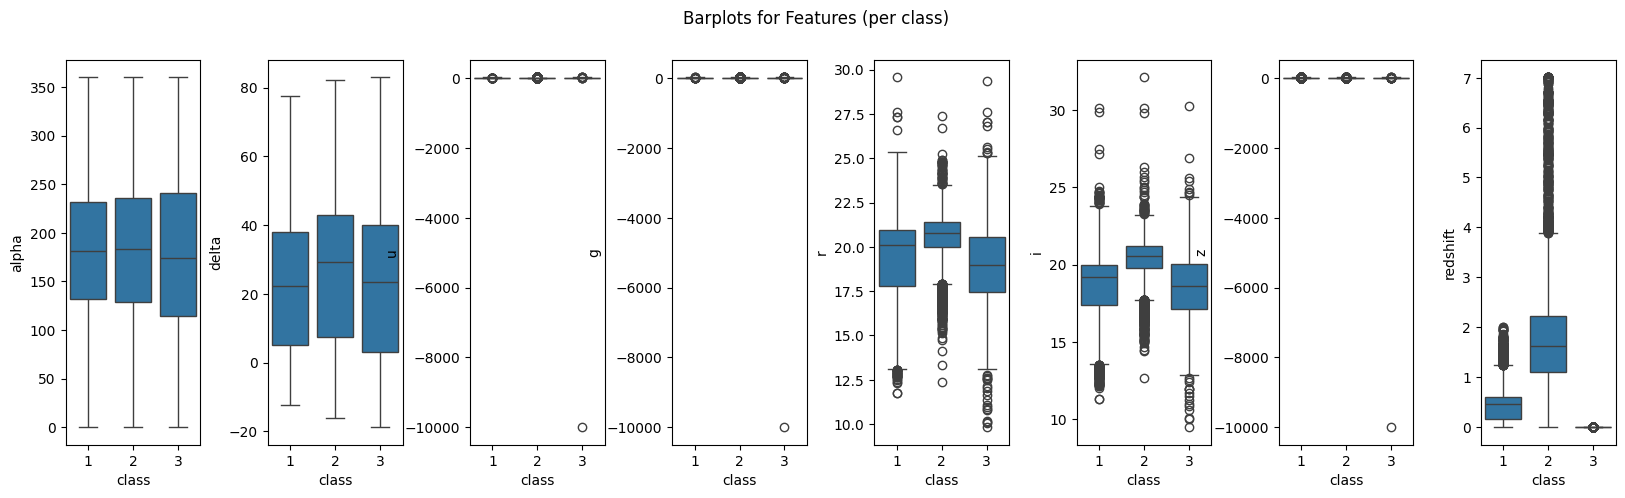

In [9]:
# features determined in feature selection later

fig, axs = plt.subplots(ncols=8, figsize=(20, 5))
plt.suptitle('Barplots for Features (per class)')
plt.subplots_adjust(wspace=0.5)
# plt.figure(figsize=(100, 5))

sns.boxplot(x="class", y="alpha", data=(df), ax=axs[0])
sns.boxplot(x="class", y="delta", data=(df),ax=axs[1])
sns.boxplot(x="class", y="u", data=(df), ax=axs[2])
sns.boxplot(x="class", y="g", data=(df), ax=axs[3])
sns.boxplot(x="class", y="r", data=(df), ax=axs[4])
sns.boxplot(x="class", y="i", data=(df), ax=axs[5])
sns.boxplot(x="class", y="z", data=(df), ax=axs[6])
sns.boxplot(x="class", y="redshift", data=(df), ax=axs[7])

Outliers for u, g, and z

In [10]:
df[["u","g","z"]].describe()

,u,g,z
count,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,18.668810
std,31.769291,31.750292,31.728152
min,-9999.000000,-9999.000000,-9999.000000
25%,20.352353,18.965230,17.460677
50%,22.179135,21.099835,19.004595
75%,23.687440,22.123767,19.921120
max,32.781390,31.602240,29.383740


In [11]:
# removing outliers
# https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/
# https://hersanyagci.medium.com/detecting-and-handling-outliers-with-pandas-7adbfcd5cad8

def iqr_removal(name):
  IQR = df[name].quantile(0.75) - df[name].quantile(0.25) # u interquartile range
  lower_boundary = df[name].quantile(0.25) - (1.5 * IQR)
  upper_boundary = df[name].quantile(0.75) + (1.5 * IQR)

  upper_array = np.where(df[name] >= upper_boundary)[0]
  lower_array = np.where(df[name] <= lower_boundary)[0]

  # Removing the outliers
  df.drop(index=upper_array, inplace=True)
  df.drop(index=lower_array, inplace=True)

In [12]:
iqr_removal("u")
iqr_removal("g")
iqr_removal("z")

In [13]:
df[["u","g","z"]].describe()

,u,g,z
count,99595.000000,99595.000000,99595.000000
mean,22.083217,20.635079,18.771876
std,2.244329,2.031305,1.761237
min,15.353710,11.798920,10.778890
25%,20.354510,18.970000,17.465125
50%,22.180650,21.101510,19.005410
75%,23.687105,22.124470,19.921770
max,28.618680,31.602240,29.383740


<Axes: xlabel='class', ylabel='redshift'>

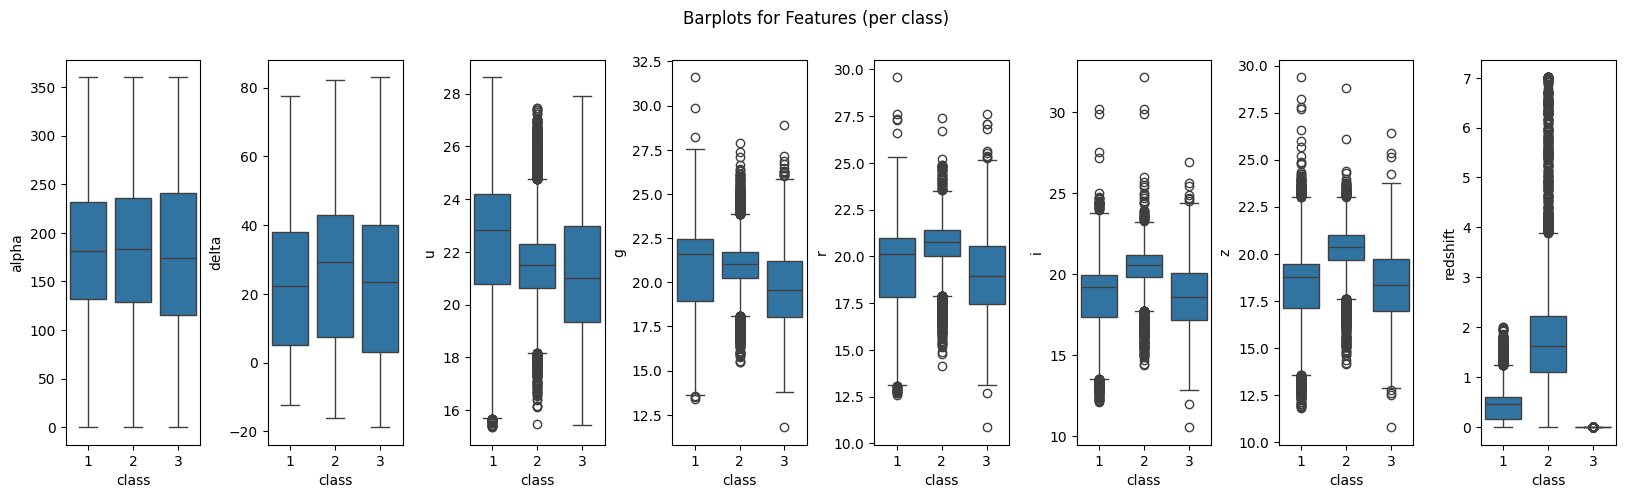

In [14]:
# features determined in feature selection later

fig, axs = plt.subplots(ncols=8, figsize=(20, 5))
plt.suptitle('Barplots for Features (per class)')
plt.subplots_adjust(wspace=0.5)
# plt.figure(figsize=(100, 5))

sns.boxplot(x="class", y="alpha", data=(df), ax=axs[0])
sns.boxplot(x="class", y="delta", data=(df),ax=axs[1])
sns.boxplot(x="class", y="u", data=(df), ax=axs[2])
sns.boxplot(x="class", y="g", data=(df), ax=axs[3])
sns.boxplot(x="class", y="r", data=(df), ax=axs[4])
sns.boxplot(x="class", y="i", data=(df), ax=axs[5])
sns.boxplot(x="class", y="z", data=(df), ax=axs[6])
sns.boxplot(x="class", y="redshift", data=(df), ax=axs[7])

In [15]:
df

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,1,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,1,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,1,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,1,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,1,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,1,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,1,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,1,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,1,0.455040,6751,56368,470


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99595 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       99595 non-null  float64
 1   alpha        99595 non-null  float64
 2   delta        99595 non-null  float64
 3   u            99595 non-null  float64
 4   g            99595 non-null  float64
 5   r            99595 non-null  float64
 6   i            99595 non-null  float64
 7   z            99595 non-null  float64
 8   run_ID       99595 non-null  int64  
 9   rerun_ID     99595 non-null  int64  
 10  cam_col      99595 non-null  int64  
 11  field_ID     99595 non-null  int64  
 12  spec_obj_ID  99595 non-null  float64
 13  class        99595 non-null  int64  
 14  redshift     99595 non-null  float64
 15  plate        99595 non-null  int64  
 16  MJD          99595 non-null  int64  
 17  fiber_ID     99595 non-null  int64  
dtypes: float64(10), int64(8)
memory usage: 14.4 MB


## Undersample for equal distribution

In [17]:
# check for class distribution
df['class'].value_counts()

,count
class,
1,59206
3,21489
2,18900


In [18]:
# undersample for equal distribution
# look into other tactics?

usdf = df.groupby('class').apply(lambda x: x.sample(n=min(15000, len(x))))

usdf['class'].value_counts()

<ipython-input-18-173ba14e8481>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  usdf = df.groupby('class').apply(lambda x: x.sample(n=min(15000, len(x))))


,count
class,
1,15000
2,15000
3,15000


## Feature Selection

In [19]:
usdf.corrwith(usdf['class']).sort_values()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
g,-0.266601
u,-0.264769
redshift,-0.187957
r,-0.142598
spec_obj_ID,-0.078723
plate,-0.078722
i,-0.071976
MJD,-0.066123
fiber_ID,-0.062523
run_ID,-0.037704


<Axes: >

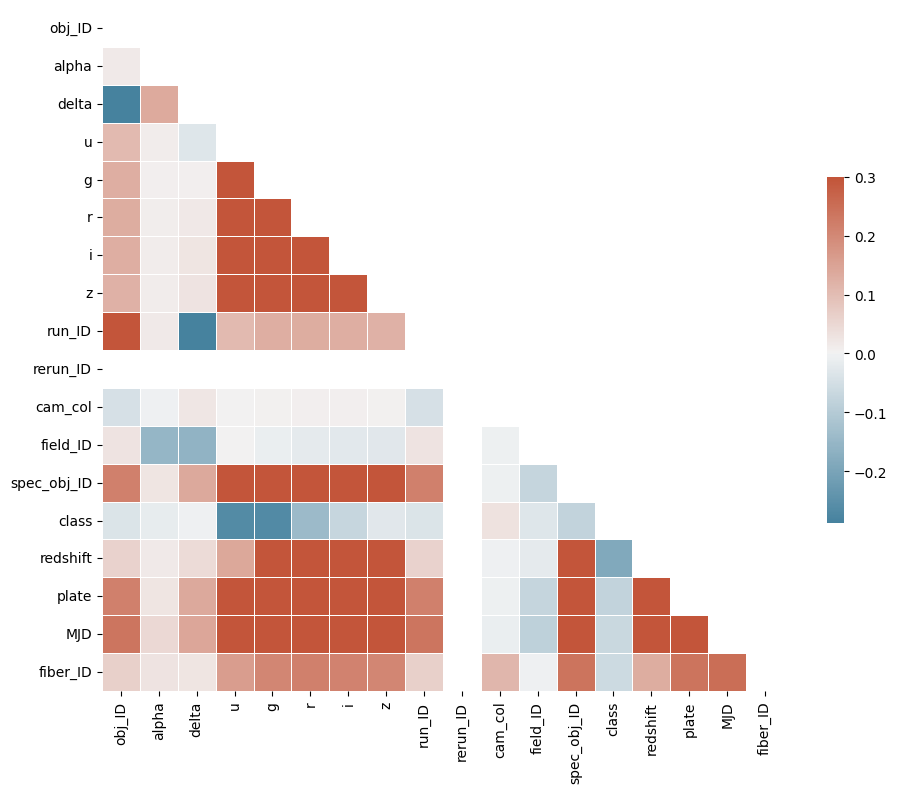

In [20]:
# Compute the correlation matrix
corr = usdf.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

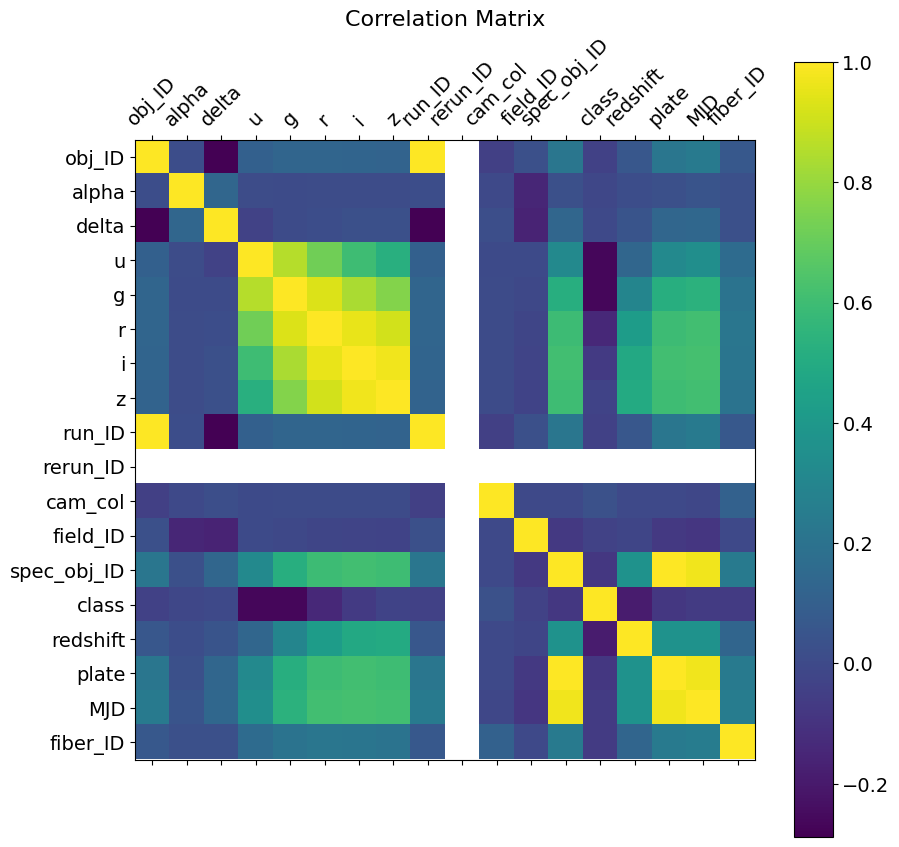

In [21]:
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas#29432741

f = plt.figure(figsize=(10, 10))
plt.matshow(usdf.corr(), fignum=f.number)
plt.xticks(range(usdf.select_dtypes(['number']).shape[1]), usdf.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(usdf.select_dtypes(['number']).shape[1]), usdf.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

The features that correlate with class in the dataset seem counterintuitive to what features logically should be selected. One would imagine that features relating to the actual data for the object should be kept (e.g. light data) and data relating to the observation equipment is mosty extraneaous.

However, actually running the correlation calculations shows that some of this light data (alpha, delta) is only minimally correlated with the class of the object, and that some image collectection data (spec_obj_ID, plate) is highly correlated. So a decision had to be made on what to base our feature selection on.

To decide, we looked at what others decided when working with the same dataset. The majority chose to drop the image data:

> "I understand that some features in the dataset are significantly useful such as navigation angles — ascension and declination, filters of the photometric system — u, g, r, i, z, and redshift. And, the rest of the other columns in the dataset are IDs that are not useful in the learning stage."
<br/>
https://towardsdatascience.com/stellar-classification-a-machine-learning-approach-5e23eb5cadb1

> "Since we already decided our features to be the values collected from the photometric system, we will only be working with 6 columns (5 features and 1 response). The 5 feature columns are u, g, r, i, and z, which are the values obtained from 5 different filters in the photometric system."
<br/>
https://jhryu.com/posts/stellar-classification/#data-preprocessing

> "In addition, since spec_obj_ID, obj_ID, run_ID, rerun_ID, cam_col, fiber_ID plate and classification results are essentially irrelevant, which should be deleted when processing the classification task. And class is the classification target, which should also be deleted in the study of feature importance."
<br/>
  [Zhou, T. (2024). Comparison of machine learning algorithms and feature importance analysis for star classification. Applied and Computational Engineering, 30, 261-270.](https://www.ewadirect.com/proceedings/ace/article/view/9870/pdf)

# Prepare Model

In [22]:
df_data = usdf[["alpha", "delta", "u", "g", "r", "i",
"z", "redshift"]]

In [23]:
df_target = df[["class"]]

#divide data
split_index1 = int(0.6* len(df_data))
split_index2 = int(0.8* len(df_data))

train_inputs = df_data[:split_index1]  # First 60% for training
val_inputs = df_data[split_index1:split_index2] #next 20% validation
test_inputs = df_data[split_index2:]  #last 20% for testing

train_targets = df_target[:split_index1]
val_targets = df_target[split_index1:split_index2]
test_targets = df_target[split_index2:]

#convert to numpy array
train_input_np = train_inputs.to_numpy()
val_input_np = val_inputs.to_numpy()
test_input_np = test_inputs.to_numpy()

train_target_np = train_targets.to_numpy()
val_target_np = val_targets.to_numpy()
test_target_np = test_targets.to_numpy()

#convert to numpy stack
train_input_stack = np.vstack(train_input_np)
val_input_stack = np.vstack(val_input_np)
test_input_stack = np.vstack(test_input_np)

train_target_stack = np.vstack(train_target_np)
val_target_stack = np.vstack(val_target_np)
test_target_stack = np.vstack(test_target_np)


In [24]:
# df["z"].unique()

train_inputs = train_input_stack.astype(np.float32)
train_targets = train_target_stack.astype(np.float32)

val_inputs = val_input_stack.astype(np.float32)
val_targets = val_target_stack.astype(np.float32)

test_inputs = test_input_stack.astype(np.float32)
test_targets = test_target_stack.astype(np.float32)

In [25]:
df_data

alpha      delta         u         g         r         i  \
class                                                                        
1     58004  130.020543  49.007354  22.84264  25.38538  23.07081  21.49715   
      25193  343.982893  26.866688  25.22491  22.81377  21.90123  20.47877   
      15435  240.581476  23.405435  19.15350  17.52248  16.83788  16.52558   
      22255  219.757830  50.780286  24.64931  22.41866  20.76899  19.62387   
      12673  135.801820  32.914060  28.18762  28.20660  15.15660  16.51393   
...                 ...        ...       ...       ...       ...       ...   
3     85143   34.478816  -0.735694  22.71478  19.91075  18.41598  17.51095   
      51644  113.860796  34.755415  25.05211  23.25794  21.38724  20.30417   
      89720  225.700853  40.193237  21.64713  20.80058  20.68456  20.69077   
      11846   15.423404   0.888104  24.66757  22.90957  22.14024  21.69007   
      51983  145.640263  38.182969  19.32285  17.98376  17.38659  17.16066   

                    z  redshift  
class                            
1     58004  19.87079  0.858216  
      25193  19.61808  0.713099  
      15435  16.28224  0.050846  
      22255  18.97933  0.556443  
      12673  14.87752  0.459043  
...               ...       ...  
3     85143  16.87275  0.000115  
      51644  19.54629  0.000128  
      89720  20.68749 -0.000769  
      11846  21.49541 -0.000103  
      51983  17.08245 -0.000008  

[45000 rows x 8 columns]

# Testing Models

Testing Different parameters

In [26]:
def stellar_model(intermediate_layers, layer_units, optimize, loss_function, my_epochs, batchsize):

    #define intermediate layers and layer units for model
    layers_for_model = []
    for i in range(intermediate_layers):
      layers_for_model.append(layers.Dense(layer_units, activation="relu"))


    model = keras.Sequential(layers_for_model + [layers.Dense(8, activation="softmax")])

    model.compile(optimizer=optimize,
                  loss=loss_function,
                  metrics=["accuracy"])


    history = model.fit(train_inputs, train_targets,
                        epochs=my_epochs,
                        batch_size=16,
                        validation_data = (val_inputs, val_targets))

    history_dict = history.history
    history_dict.keys()

    history_dict = history.history
    loss = history_dict["loss"]
    val_loss = history_dict["val_loss"]
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]

    plt.plot(acc, "bo", label="Training acc")
    plt.plot( val_acc, "b", label="Validation acc")

    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    print("Highest Validation Accuracy: ", max(val_acc))


    plt.plot(loss, "bo", label="Training Loss")
    plt.plot( val_loss, "b", label="Validation Loss")

    plt.title("Training and validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()




Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.4675 - loss: 2.9032 - val_accuracy: 0.5658 - val_loss: 1.0264
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5406 - loss: 1.0501 - val_accuracy: 0.5684 - val_loss: 1.3217
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5597 - loss: 1.0256 - val_accuracy: 0.5684 - val_loss: 1.0676
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5603 - loss: 1.0153 - val_accuracy: 0.5686 - val_loss: 0.9967
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5742 - loss: 1.0007 - val_accuracy: 0.5684 - val_loss: 1.0671
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5748 - loss: 0.9955 - val_accuracy: 0.5684 - val_loss: 0.9884
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5699 - loss: 0.9931 - val_accuracy: 0.5684 - val_loss: 0.9948
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5814 - loss: 0.9829 -

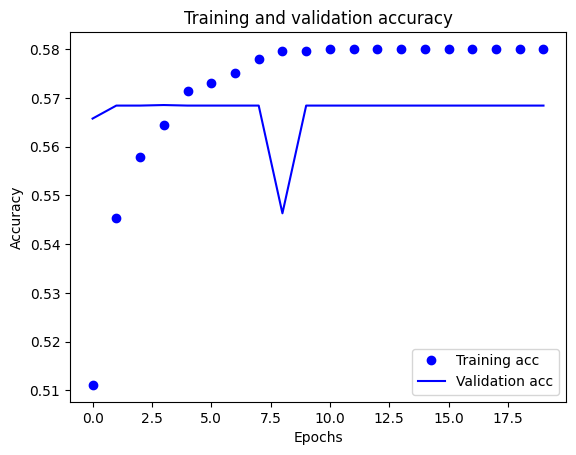

Highest Validation Accuracy:  0.5685555338859558


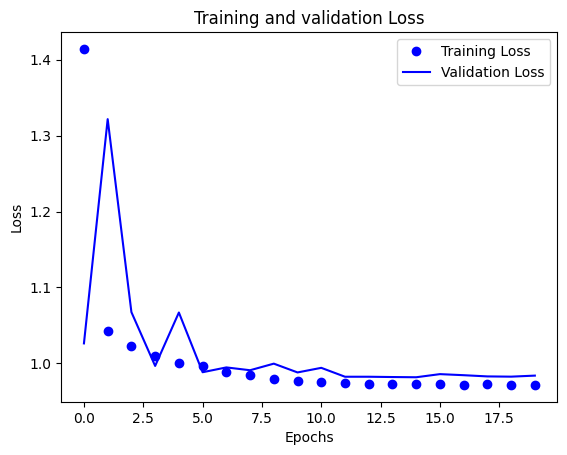

In [27]:
default = stellar_model(2, 16, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4714 - loss: 3.1983 - val_accuracy: 0.5676 - val_loss: 1.3907
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4834 - loss: 1.1792 - val_accuracy: 0.2586 - val_loss: 1.6913
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4933 - loss: 1.1580 - val_accuracy: 0.5679 - val_loss: 1.3005
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5006 - loss: 1.1443 - val_accuracy: 0.5684 - val_loss: 1.2810
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5046 - loss: 1.1323 - val_accuracy: 0.5684 - val_loss: 1.1628
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5140 - loss: 1.1168 - val_accuracy: 0.2918 - val_loss: 1.3051
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5103 - loss: 1.1218 - val_accuracy: 0.5574 - val_loss: 1.0249
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5071 - loss: 1.1119 - 

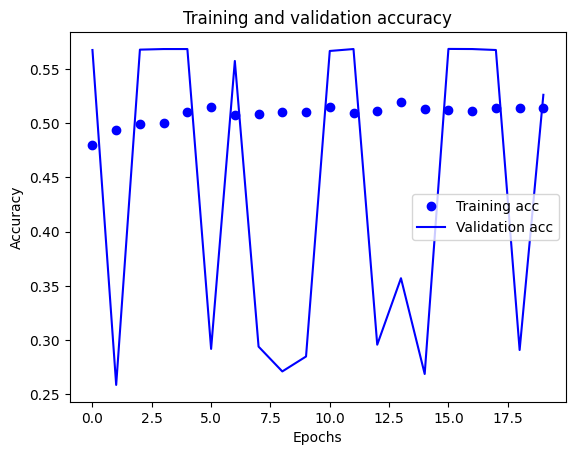

Highest Validation Accuracy:  0.5685555338859558


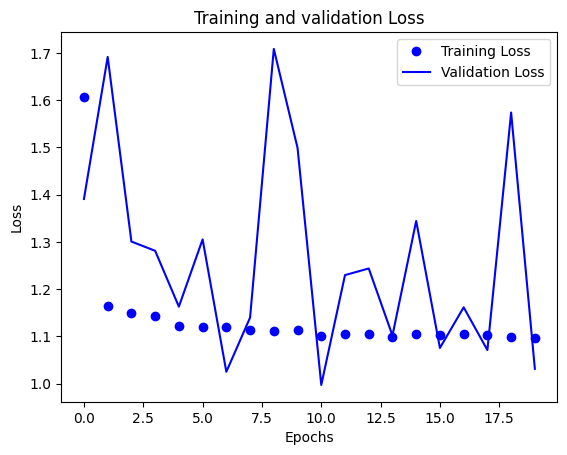

In [28]:
#1 dense Layer
stellar_model(1, 32, "rmsprop", "sparse_categorical_crossentropy", 20, 64)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5442 - loss: 1.2185 - val_accuracy: 0.5674 - val_loss: 1.0032
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5783 - loss: 0.9885 - val_accuracy: 0.5684 - val_loss: 0.9862
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5828 - loss: 0.9749 - val_accuracy: 0.5684 - val_loss: 0.9835
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5833 - loss: 0.9715 - val_accuracy: 0.5684 - val_loss: 0.9831
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5796 - loss: 0.9744 - val_accuracy: 0.5684 - val_loss: 0.9887
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5815 - loss: 0.9729 - val_accuracy: 0.5684 - val_loss: 0.9836
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5780 - loss: 0.9766 - val_accuracy: 0.5684 - val_loss: 0.9843


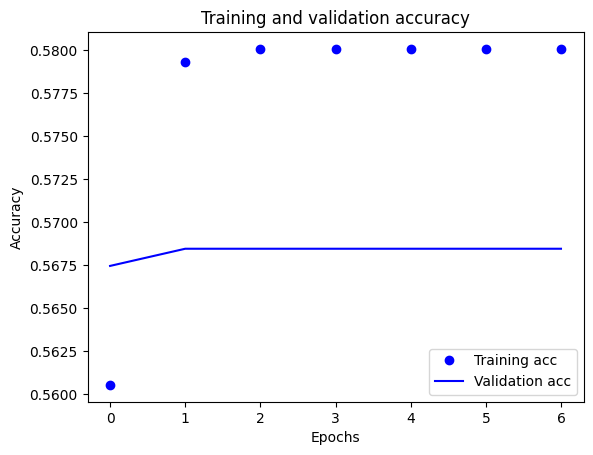

Highest Validation Accuracy:  0.5684444308280945


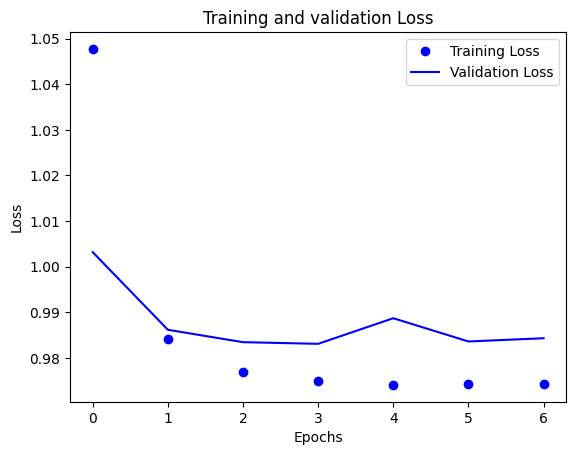

In [29]:
#3 dense Layers
stellar_model(3, 16, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5273 - loss: 1.7973 - val_accuracy: 0.4913 - val_loss: 1.0506
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5818 - loss: 0.9782 - val_accuracy: 0.5684 - val_loss: 0.9875
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5780 - loss: 0.9796 - val_accuracy: 0.5684 - val_loss: 0.9824
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5816 - loss: 0.9739 - val_accuracy: 0.5684 - val_loss: 0.9841
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5832 - loss: 0.9708 - val_accuracy: 0.5684 - val_loss: 0.9832
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5761 - loss: 0.9769 - val_accuracy: 0.5684 - val_loss: 0.9847
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5745 - loss: 0.9783 - val_accuracy: 0.5684 - val_loss: 0.9839
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5823 - loss: 0.9706 - 

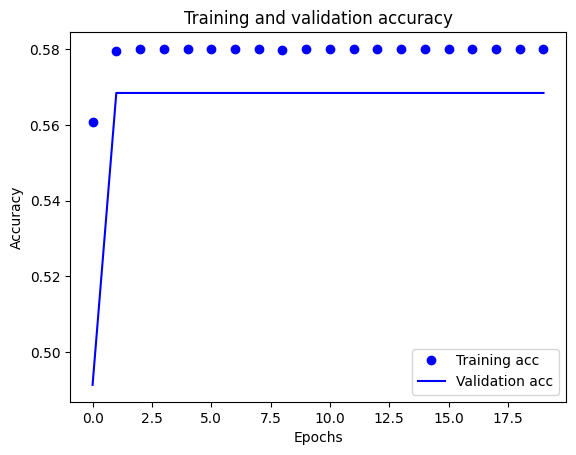

Highest Validation Accuracy:  0.5684444308280945


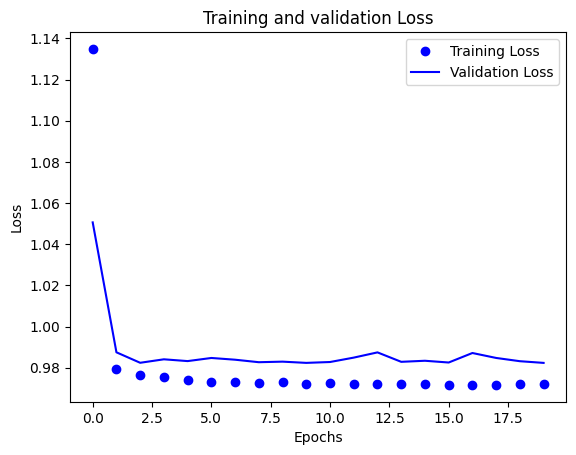

In [30]:
#4 dense Layers
stellar_model(4, 16, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5451 - loss: 1.3484 - val_accuracy: 0.5684 - val_loss: 0.9876
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5800 - loss: 0.9811 - val_accuracy: 0.5684 - val_loss: 0.9915
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5822 - loss: 0.9761 - val_accuracy: 0.5684 - val_loss: 0.9920
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5811 - loss: 0.9759 - val_accuracy: 0.5684 - val_loss: 0.9840
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5826 - loss: 0.9729 - val_accuracy: 0.5684 - val_loss: 0.9856
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5789 - loss: 0.9752 - val_accuracy: 0.5684 - val_loss: 0.9935
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5800 - loss: 0.9737 - val_accuracy: 0.5684 - val_loss: 0.9850
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5840 - loss: 0.9698 - 

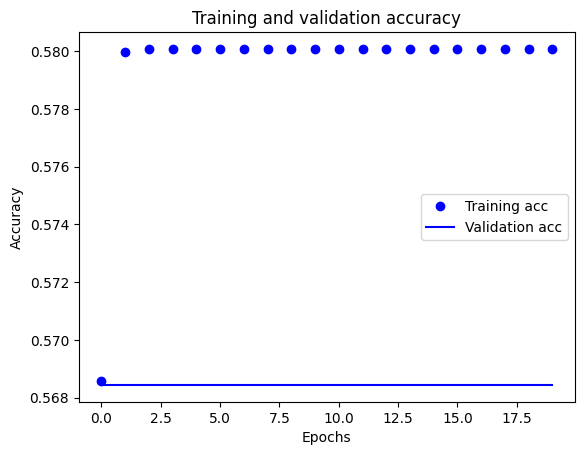

Highest Validation Accuracy:  0.5684444308280945


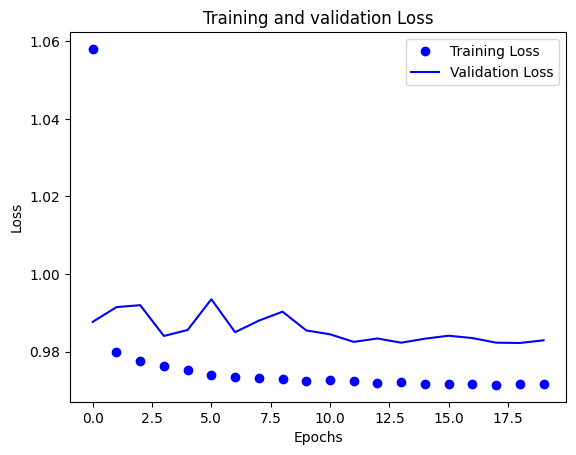

In [31]:
#5 dense Layers
stellar_model(5, 16, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

## Intermediate Layer Result: 1 Layer had highest val accuracy. 2 Layers was also very high

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4055 - loss: 3.3982 - val_accuracy: 0.5684 - val_loss: 0.9872
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5795 - loss: 0.9765 - val_accuracy: 0.5684 - val_loss: 0.9898
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5791 - loss: 0.9751 - val_accuracy: 0.5684 - val_loss: 0.9915
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5839 - loss: 0.9703 - val_accuracy: 0.5684 - val_loss: 0.9845
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5811 - loss: 0.9715 - val_accuracy: 0.5684 - val_loss: 0.9850
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5786 - loss: 0.9740 - val_accuracy: 0.5684 - val_loss: 0.9844
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5833 - loss: 0.9688 - val_accuracy: 0.5684 - val_loss: 0.9826
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5833 - loss: 0.9692 - 

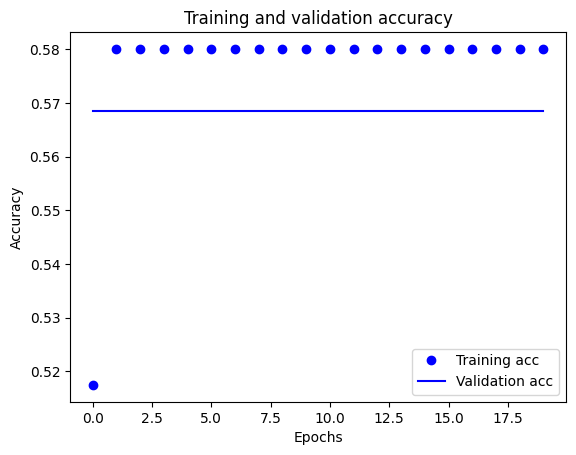

Highest Validation Accuracy:  0.5684444308280945


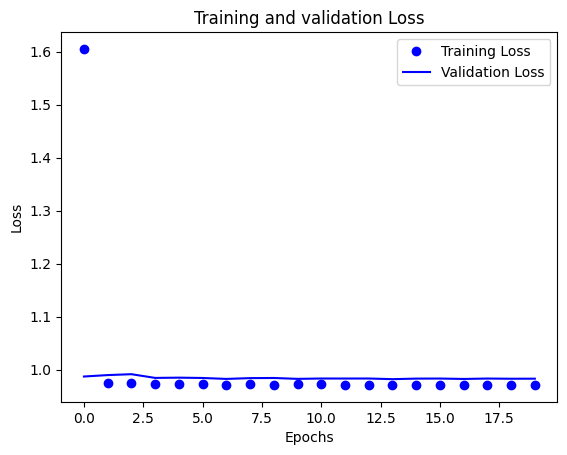

In [32]:
#8 unit Layers
stellar_model(2, 8, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4511 - loss: 2.5387 - val_accuracy: 0.5684 - val_loss: 1.0235
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5154 - loss: 1.1263 - val_accuracy: 0.5684 - val_loss: 1.1538
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5499 - loss: 1.0374 - val_accuracy: 0.5684 - val_loss: 1.0308
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5625 - loss: 1.0096 - val_accuracy: 0.5614 - val_loss: 1.0002
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5802 - loss: 0.9812 - val_accuracy: 0.5684 - val_loss: 0.9846
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5745 - loss: 0.9828 - val_accuracy: 0.5684 - val_loss: 0.9889
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5718 - loss: 0.9855 - val_accuracy: 0.5684 - val_loss: 1.0072


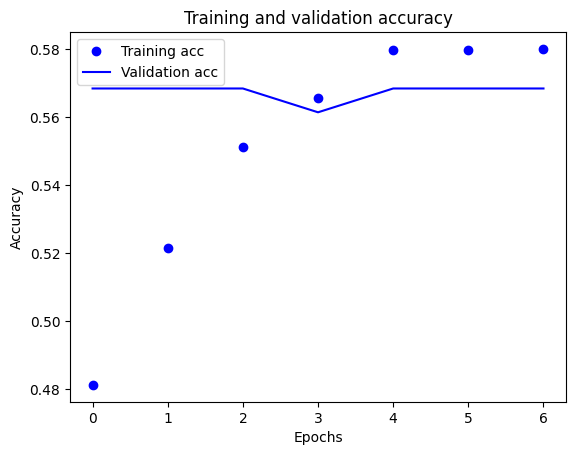

Highest Validation Accuracy:  0.5684444308280945


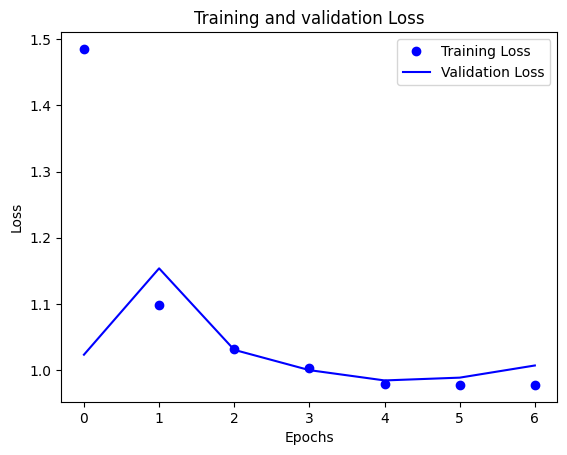

In [33]:
#32 unit Layers
stellar_model(2, 32, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

##Best Model so Far
Highest Validation Accuracy:  0.9538499712944031

stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 16)


Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4783 - loss: 1.5446 - val_accuracy: 0.5684 - val_loss: 1.0910
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5364 - loss: 1.0499 - val_accuracy: 0.5684 - val_loss: 1.0691
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5745 - loss: 0.9967 - val_accuracy: 0.5634 - val_loss: 0.9928
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5799 - loss: 0.9846 - val_accuracy: 0.5639 - val_loss: 1.0020
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5793 - loss: 0.9799 - val_accuracy: 0.5684 - val_loss: 0.9910
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5770 - loss: 0.9799 - val_accuracy: 0.5684 - val_loss: 0.9848
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5868 - loss: 0.9683 - val_accuracy: 0.5684 - val_loss: 0.9860


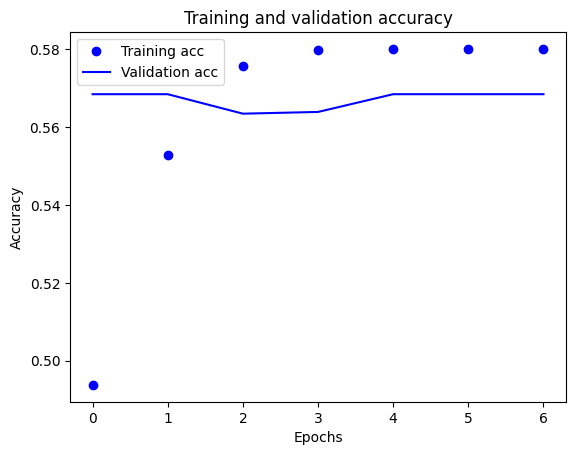

Highest Validation Accuracy:  0.5684444308280945


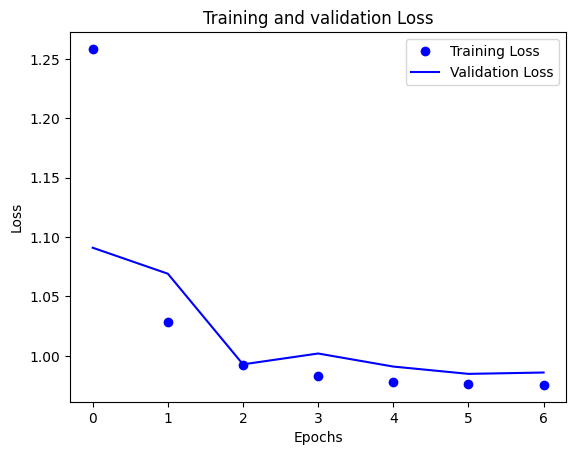

In [34]:
#64 unit Layers
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4355 - loss: 3.3453 - val_accuracy: 0.5684 - val_loss: 1.5009
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4825 - loss: 1.2591 - val_accuracy: 0.3338 - val_loss: 1.2465
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4930 - loss: 1.1872 - val_accuracy: 0.5686 - val_loss: 1.1194
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5029 - loss: 1.1295 - val_accuracy: 0.3963 - val_loss: 1.1249
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5180 - loss: 1.0928 - val_accuracy: 0.5684 - val_loss: 0.9995
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5367 - loss: 1.0546 - val_accuracy: 0.5686 - val_loss: 1.0132
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5399 - loss: 1.0441 - val_accuracy: 0.5684 - val_loss: 0.9984
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5447 - loss: 1.0317 - 

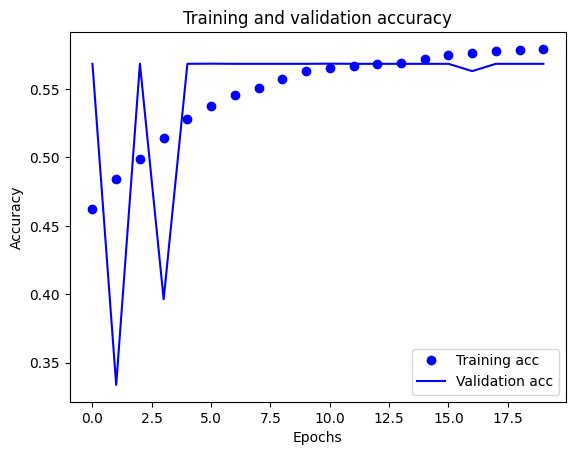

Highest Validation Accuracy:  0.5685555338859558


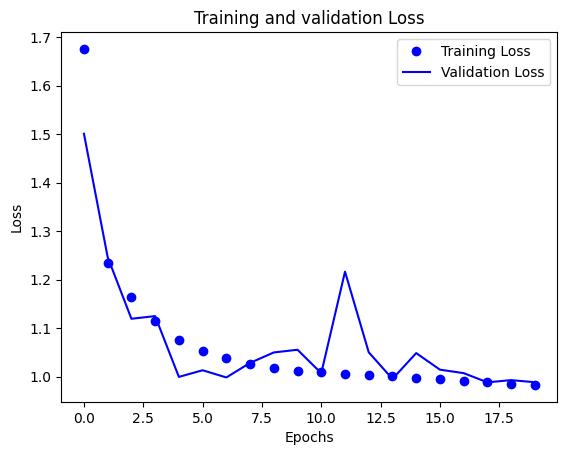

In [35]:
#64 unit Layers
#1 Intermediate Layer
stellar_model(1, 64, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.4674 - loss: 2.0821 - val_accuracy: 0.5201 - val_loss: 1.0364
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5720 - loss: 0.9985 - val_accuracy: 0.5684 - val_loss: 0.9920
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5790 - loss: 0.9823 - val_accuracy: 0.5684 - val_loss: 0.9824
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5774 - loss: 0.9788 - val_accuracy: 0.5684 - val_loss: 0.9841
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5820 - loss: 0.9731 - val_accuracy: 0.5684 - val_loss: 0.9880
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5784 - loss: 0.9762 - val_accuracy: 0.5684 - val_loss: 0.9837
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5833 - loss: 0.9706 - val_accuracy: 0.5684 - val_loss: 0.9840


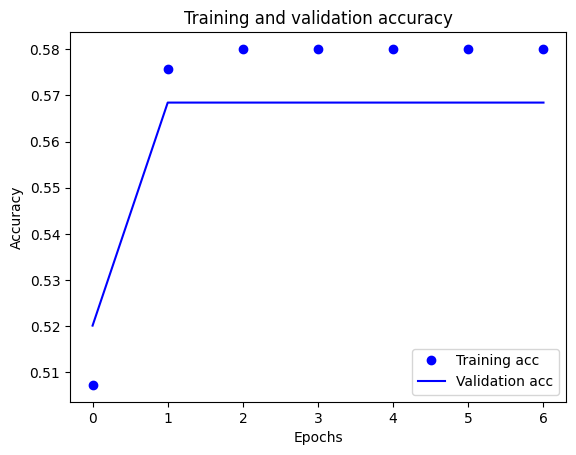

Highest Validation Accuracy:  0.5684444308280945


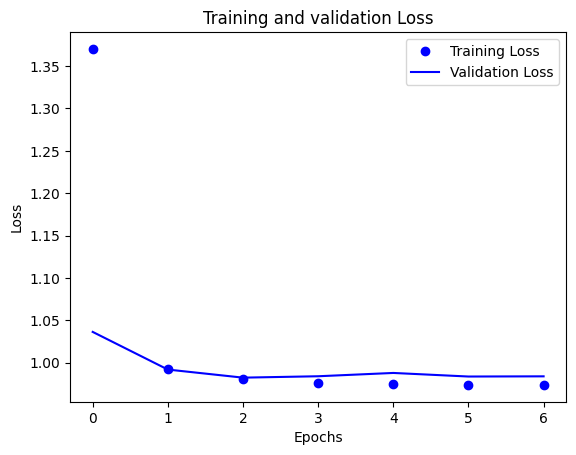

In [36]:
#128 unit Layers
stellar_model(2, 128, "rmsprop", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5624 - loss: 2.8222 - val_accuracy: 0.5686 - val_loss: 0.9920
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5756 - loss: 0.9940 - val_accuracy: 0.5634 - val_loss: 0.9900
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5774 - loss: 0.9808 - val_accuracy: 0.5684 - val_loss: 0.9843
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5826 - loss: 0.9820 - val_accuracy: 0.5668 - val_loss: 0.9928
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5779 - loss: 0.9800 - val_accuracy: 0.5684 - val_loss: 1.0011
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5844 - loss: 0.9717 - val_accuracy: 0.5686 - val_loss: 0.9877
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5771 - loss: 0.9779 - val_accuracy: 0.5684 - val_loss: 0.9849


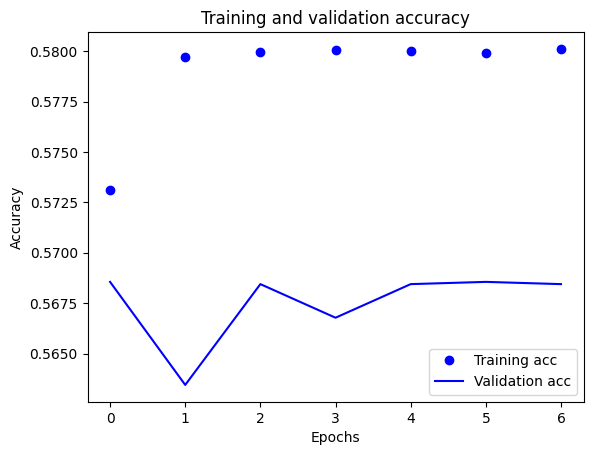

Highest Validation Accuracy:  0.5685555338859558


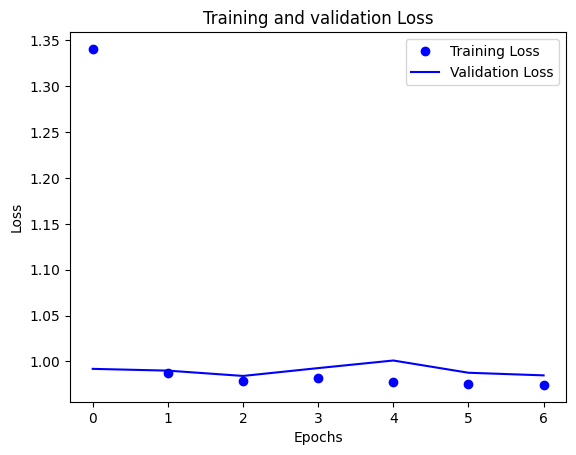

In [37]:
stellar_model(2, 64, "SGD", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
# optimizer changed to SGD https://keras.io/api/optimizers/sgd/

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4970 - loss: 1.6902 - val_accuracy: 0.5674 - val_loss: 1.3170
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5357 - loss: 1.0722 - val_accuracy: 0.4296 - val_loss: 1.0703
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5519 - loss: 1.0334 - val_accuracy: 0.5684 - val_loss: 1.0012
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5714 - loss: 0.9996 - val_accuracy: 0.5684 - val_loss: 0.9908
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5723 - loss: 0.9944 - val_accuracy: 0.5658 - val_loss: 1.0171
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5779 - loss: 0.9843 - val_accuracy: 0.5684 - val_loss: 0.9977
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5805 - loss: 0.9806 - val_accuracy: 0.5667 - val_loss: 1.0118


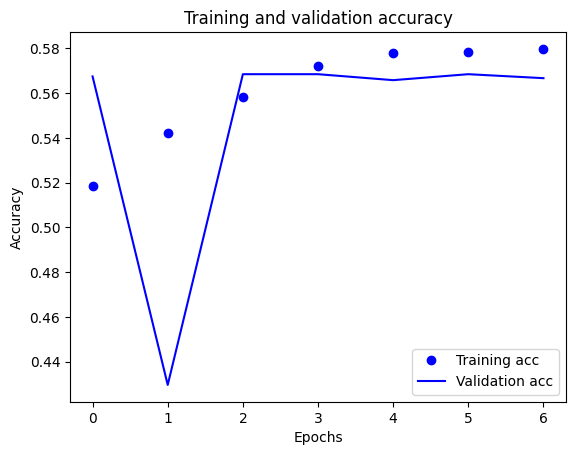

Highest Validation Accuracy:  0.5684444308280945


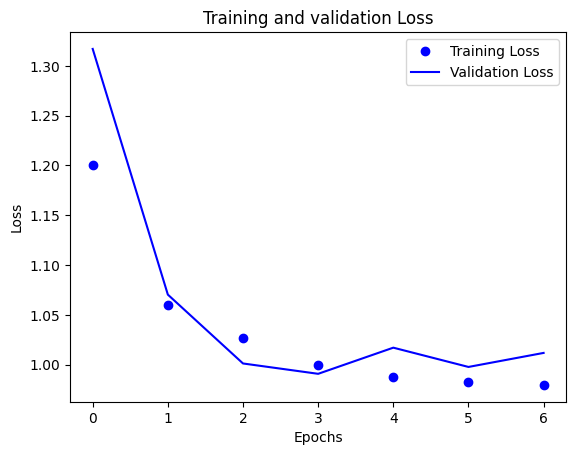

In [38]:
stellar_model(2, 64, "Adam", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
# optimizer changed to Adam


Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4813 - loss: 3.3337 - val_accuracy: 0.4970 - val_loss: 1.0650
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5551 - loss: 1.0388 - val_accuracy: 0.5612 - val_loss: 1.0434
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5562 - loss: 1.0305 - val_accuracy: 0.5521 - val_loss: 1.0246
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5683 - loss: 1.0117 - val_accuracy: 0.5432 - val_loss: 1.0231
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5682 - loss: 1.0078 - val_accuracy: 0.5597 - val_loss: 1.0148
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5682 - loss: 1.0054 - val_accuracy: 0.5663 - val_loss: 1.0278
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5733 - loss: 1.0003 - val_accuracy: 0.5661 - val_loss: 1.0191


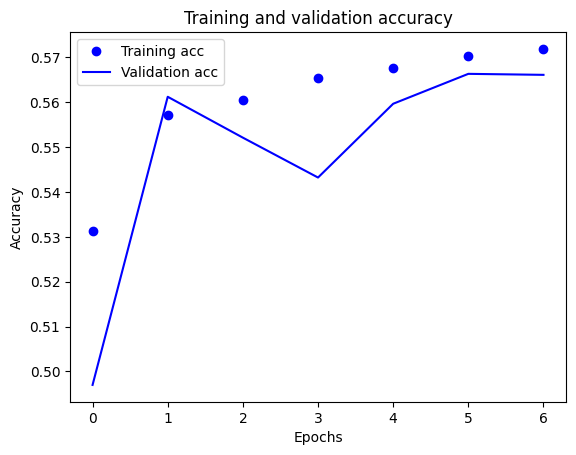

Highest Validation Accuracy:  0.5663333535194397


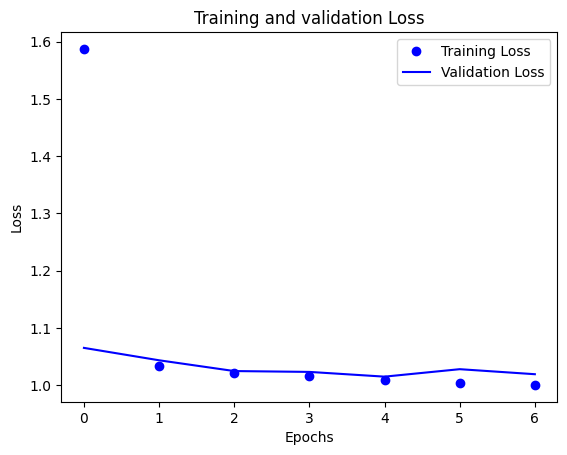

In [39]:
stellar_model(2, 64, "Adagrad", "sparse_categorical_crossentropy", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
# optimizer changed to Adagrad

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0865 - loss: 2.9898 - val_accuracy: 0.0449 - val_loss: 3.0459
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1301 - loss: 2.9950 - val_accuracy: 0.5016 - val_loss: 3.0428
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3759 - loss: 2.9992 - val_accuracy: 0.2247 - val_loss: 3.0428
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2691 - loss: 2.9700 - val_accuracy: 6.6667e-04 - val_loss: 3.0428
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1380 - loss: 2.9758 - val_accuracy: 0.2277 - val_loss: 3.0428
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1819 - loss: 2.9646 - val_accuracy: 0.2282 - val_loss: 3.0428
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1527 - loss: 3.0054 - val_accuracy: 0.2006 - val_loss: 3.0428


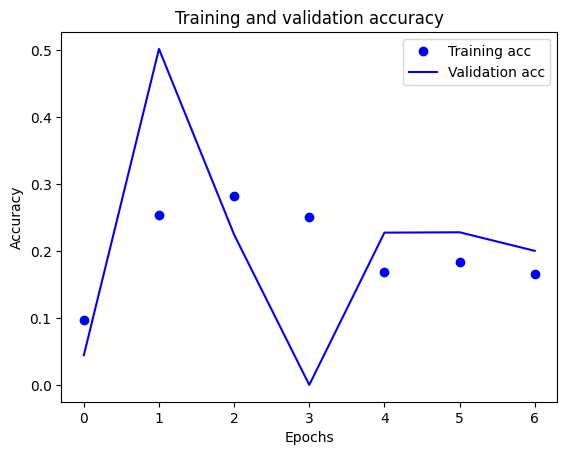

Highest Validation Accuracy:  0.5015555620193481


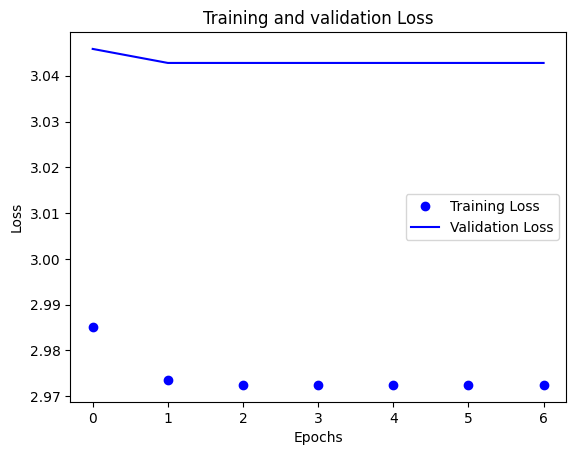

In [40]:
stellar_model(2, 64, "rmsprop", "mean_squared_error", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size


Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1446 - loss: 29.1311 - val_accuracy: 0.1649 - val_loss: 17.4636
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1234 - loss: 17.0749 - val_accuracy: 0.1423 - val_loss: 16.6613
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1414 - loss: 16.6817 - val_accuracy: 0.0040 - val_loss: 16.6357
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1371 - loss: 16.6355 - val_accuracy: 0.2278 - val_loss: 16.6356
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1891 - loss: 16.6355 - val_accuracy: 0.5633 - val_loss: 16.6356
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1369 - loss: 16.6355 - val_accuracy: 1.1111e-04 - val_loss: 16.6356
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1394 - loss: 16.6355 - val_accuracy: 0.2007 - val_loss: 16.6356


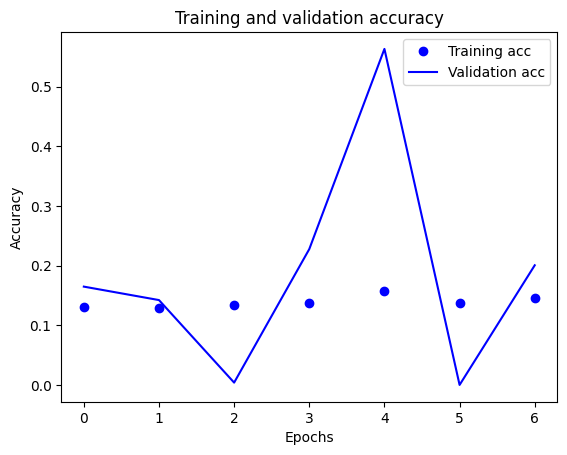

Highest Validation Accuracy:  0.5633333325386047


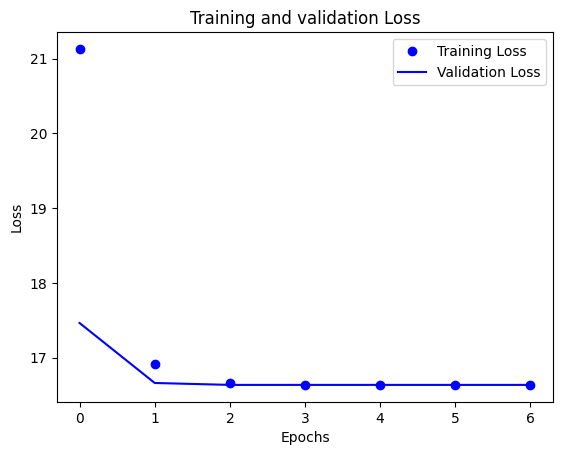

In [41]:
stellar_model(2, 64, "rmsprop", "kld", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size


Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3595 - loss: 1.5216 - val_accuracy: 0.3591 - val_loss: 1.5361
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3744 - loss: 1.5090 - val_accuracy: 0.3712 - val_loss: 1.5361
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3862 - loss: 1.5110 - val_accuracy: 0.3788 - val_loss: 1.5361
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3923 - loss: 1.5231 - val_accuracy: 0.3882 - val_loss: 1.5361
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4091 - loss: 1.5181 - val_accuracy: 0.3966 - val_loss: 1.5361
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4247 - loss: 1.5093 - val_accuracy: 0.4058 - val_loss: 1.5361
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4265 - loss: 1.5183 - val_accuracy: 0.4130 - val_loss: 1.5361


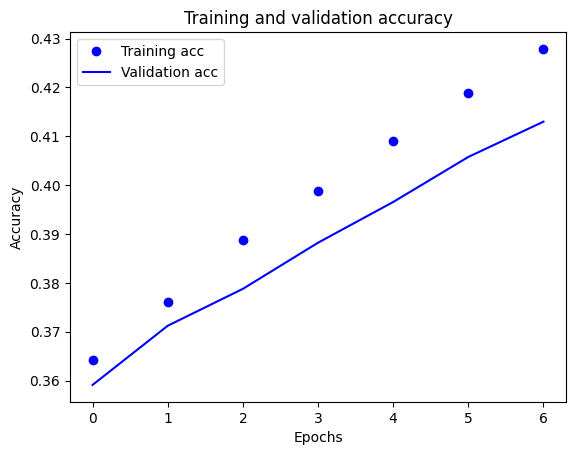

Highest Validation Accuracy:  0.4129999876022339


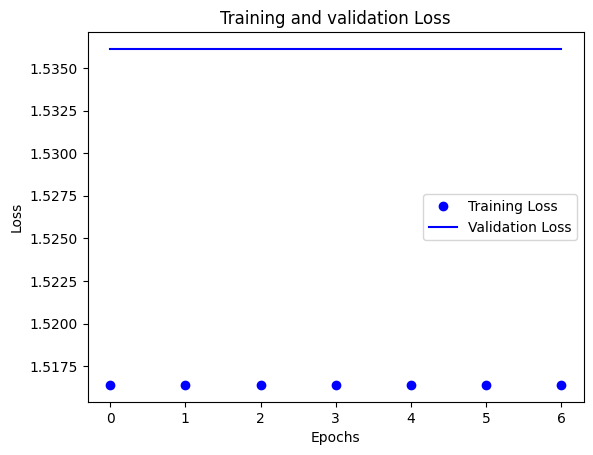

In [42]:
stellar_model(2, 64, "rmsprop", "mean_absolute_error", 7, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size


Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4554 - loss: 1.7690 - val_accuracy: 0.5674 - val_loss: 1.0789
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5591 - loss: 1.0260 - val_accuracy: 0.5684 - val_loss: 0.9906
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5798 - loss: 0.9861 - val_accuracy: 0.5684 - val_loss: 0.9870
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5820 - loss: 0.9794 - val_accuracy: 0.5684 - val_loss: 0.9856
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5797 - loss: 0.9776 - val_accuracy: 0.5684 - val_loss: 0.9839
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5741 - loss: 0.9825 - val_accuracy: 0.5684 - val_loss: 0.9837
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5794 - loss: 0.9759 - val_accuracy: 0.5684 - val_loss: 0.9834


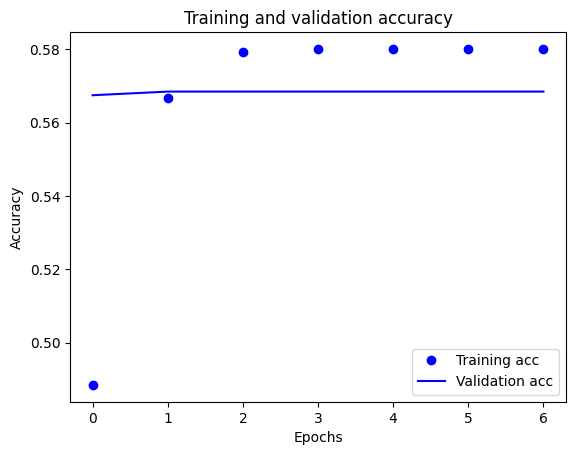

Highest Validation Accuracy:  0.5684444308280945


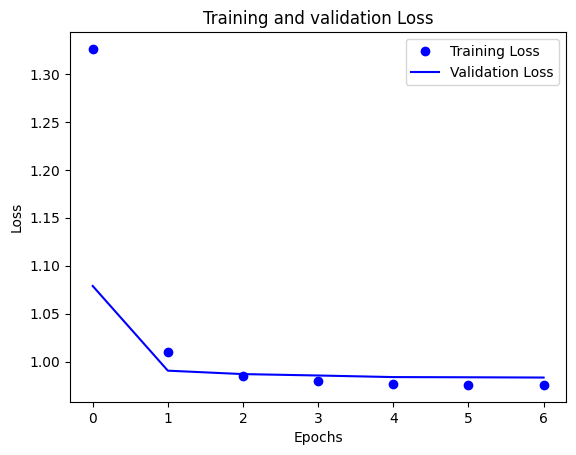

In [43]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 32)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 32

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4459 - loss: 2.5339 - val_accuracy: 0.2716 - val_loss: 1.9048
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5016 - loss: 1.1915 - val_accuracy: 0.3290 - val_loss: 1.3503
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5428 - loss: 1.0415 - val_accuracy: 0.5677 - val_loss: 1.0087
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5762 - loss: 0.9903 - val_accuracy: 0.5684 - val_loss: 0.9929
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5802 - loss: 0.9803 - val_accuracy: 0.5684 - val_loss: 0.9893
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5792 - loss: 0.9770 - val_accuracy: 0.5684 - val_loss: 0.9891
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5788 - loss: 0.9775 - val_accuracy: 0.5684 - val_loss: 0.9861


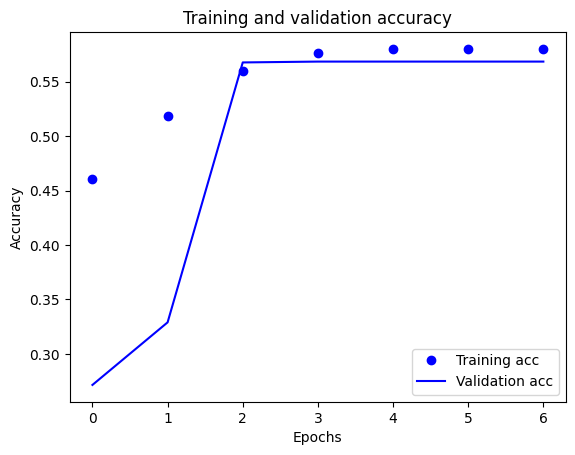

Highest Validation Accuracy:  0.5684444308280945


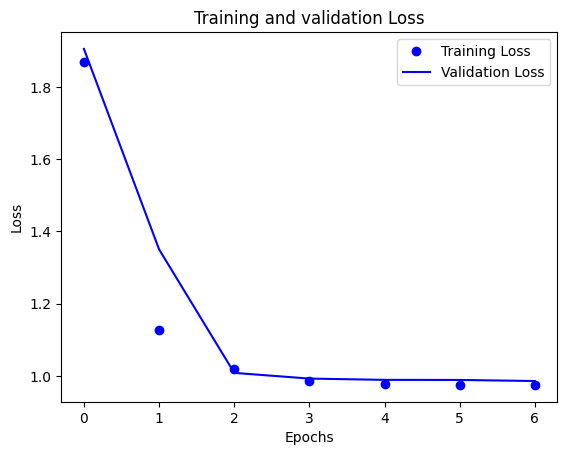

In [44]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 128)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 128

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4475 - loss: 2.3638 - val_accuracy: 0.3080 - val_loss: 1.2515
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5068 - loss: 1.1234 - val_accuracy: 0.3560 - val_loss: 1.1719
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5585 - loss: 1.0200 - val_accuracy: 0.5684 - val_loss: 1.0825
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5716 - loss: 0.9968 - val_accuracy: 0.5684 - val_loss: 0.9957
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5748 - loss: 0.9861 - val_accuracy: 0.5684 - val_loss: 0.9938
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5855 - loss: 0.9742 - val_accuracy: 0.5684 - val_loss: 1.0063
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5824 - loss: 0.9750 - val_accuracy: 0.5684 - val_loss: 0.9896


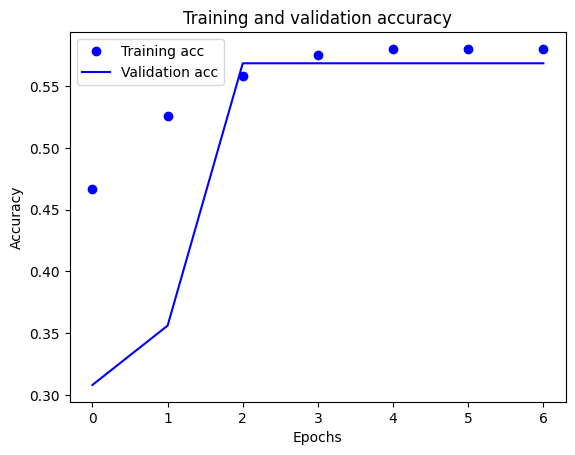

Highest Validation Accuracy:  0.5684444308280945


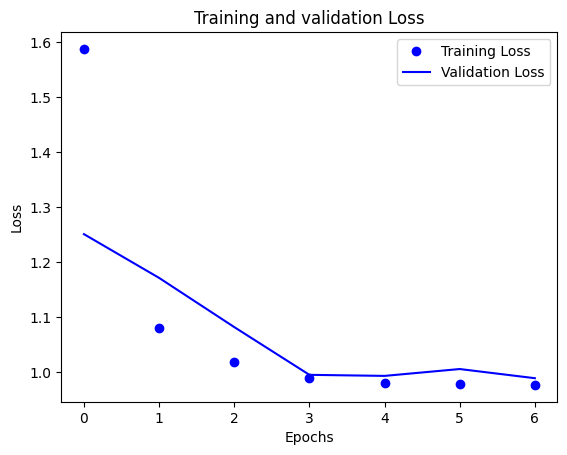

In [45]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 256)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 256

Epoch 1/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4470 - loss: 1.9703 - val_accuracy: 0.5671 - val_loss: 1.3756
Epoch 2/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5281 - loss: 1.0816 - val_accuracy: 0.5684 - val_loss: 1.0165
Epoch 3/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5688 - loss: 0.9952 - val_accuracy: 0.5684 - val_loss: 1.0027
Epoch 4/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5826 - loss: 0.9752 - val_accuracy: 0.5684 - val_loss: 0.9873
Epoch 5/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5747 - loss: 0.9812 - val_accuracy: 0.5684 - val_loss: 0.9926
Epoch 6/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5833 - loss: 0.9722 - val_accuracy: 0.5684 - val_loss: 0.9863
Epoch 7/7
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5823 - loss: 0.9721 - val_accuracy: 0.5684 - val_loss: 0.9842


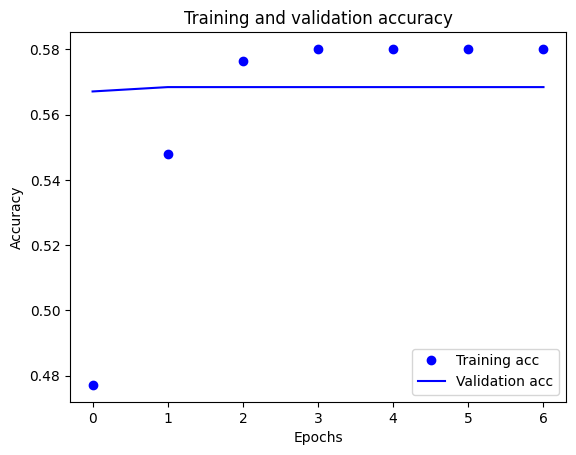

Highest Validation Accuracy:  0.5684444308280945


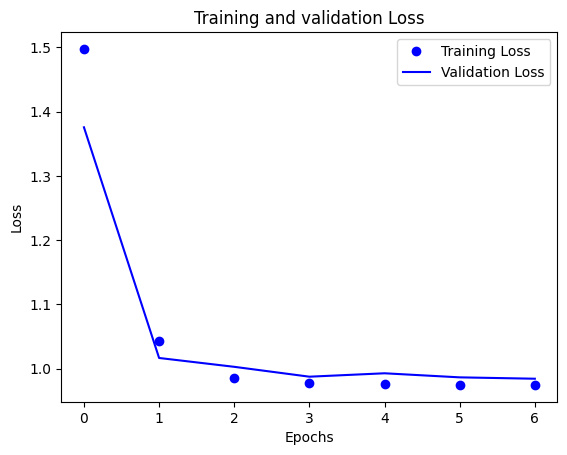

In [46]:
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 7, 512)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size
#batch size of 512

#Best so far

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4600 - loss: 1.7745 - val_accuracy: 0.4244 - val_loss: 1.1103
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5187 - loss: 1.1151 - val_accuracy: 0.5684 - val_loss: 1.0303
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5636 - loss: 1.0110 - val_accuracy: 0.5684 - val_loss: 1.0000
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5799 - loss: 0.9854 - val_accuracy: 0.5684 - val_loss: 0.9895
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5763 - loss: 0.9797 - val_accuracy: 0.5684 - val_loss: 0.9894
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5725 - loss: 0.9821 - val_accuracy: 0.5684 - val_loss: 0.9829
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5806 - loss: 0.9745 - val_accuracy: 0.5684 - val_loss: 0.9837
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5808 - loss: 0.9731 - 

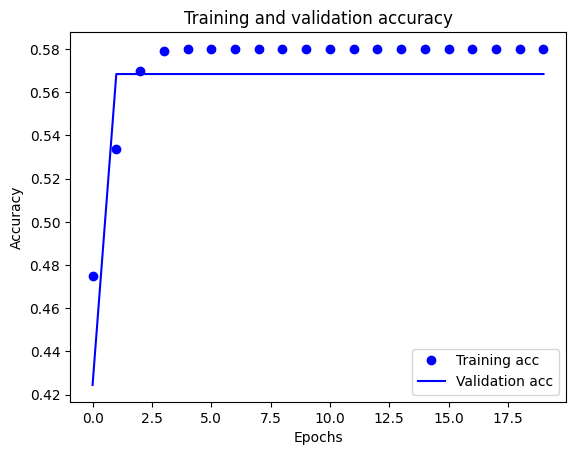

Highest Validation Accuracy:  0.5684444308280945


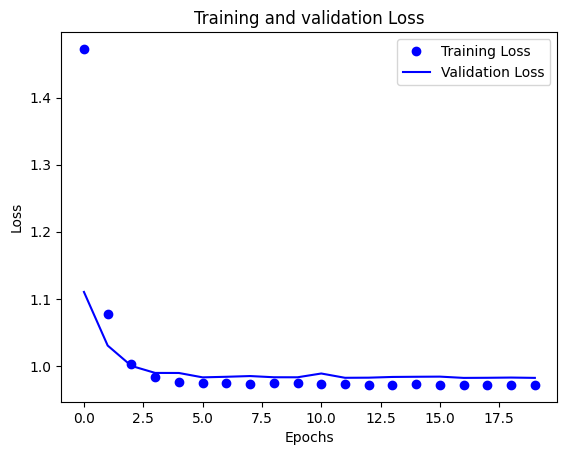

In [47]:
#64 unit Layers
stellar_model(2, 64, "rmsprop", "sparse_categorical_crossentropy", 20, 16)
# intemediate_layers, layer_units, optimize, loss_function, my_epochs, batch size

### **NOTES**

In [48]:
print("test")

test


losses:
- [categorical_crossentropy](https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class) does not work (bc of inherent loss or error in code?)